## Exercise 1 

#### **Submission** <br>28.04. 12:00pm (via studIP) 
#### **Defense** <br> 08.05. 08:00-10:00, 08.05. 16:00-18:00 or 09.05. 10:00-12:00 

A **maximum** of 3 percentage points bonus for the exam can be achieved with each sheet if:
1) at least 60% of the worksheet has been completed correctly 
2) the worksheet has been successfully defended (explained to the tutors).

*Conditions*:
- Each group must register for a slot in studIP for the defense. Only ONE person registers a slot. The whole group must appear for defense.
- Successful defense means that a team member selected by us explains the solution and answers questions about it.
- ChatGPT and other tools may be used, but must be cited.
- The code must be explained without any aids.
- We will not only evaluate the correctness of the results, but also whether the code is efficient, easy to understand, tidy and well documented.
- Each group submits only one solution as a zip file, which is provided with the name and student number of a group member. For example, `mustermann_12345678.zip`. 
- Please also enter the names and student numbers of all group members here:
  - [Masood Rahman] [15147339]
  - [Nina Yehorova] []
  - 

In this notebook, we will implement an approximation of the sine function step by step.  
To do this, we use the property that `sin(x)` can be represented by a sum: 

$$
sin(x) = \sum_0^\infty (-1)^n \frac{x^{2n+1}}{(2n+1)!}
$$

See [Wikipedia](https://de.wikipedia.org/wiki/Sinus_und_Kosinus)

Hint: Use the help function (e.g. `? sin`)

1) Write a function to calculate the factorial of a given number. **(20%)**

In [2]:
def factorial(n):
    """
    Calculate the factorial of a non-negative integer n.

    Parameters:
        n (int): A non-negative integer.

    Returns:
        int: The factorial of n.

    Raises:
        ValueError: If n is a negative integer.
    """
    if n < 0:
        raise ValueError("Factorial is not defined for negative integers.")
    if type(n)!=int:
        raise TypeError("Factorial is only defined for positive integers.")
    
    result = 1
    for i in range(2, n + 1):
        result *= i
    
    return result

In [3]:
factorial(5)

120

2) Write a function that calculates the sum described above up to a limit (given as a parameter of the function). **(15%)**

In [4]:
def sin_series(x,num_terms):
    """
    Approximates sin(x) upto given number of terms
    
    Parameters: 
        x (float): The value at which to evaluate the sine function.
        num_terms (int): The number of terms to incude in the series >=0
    Returns:
        float
    Raises:
        ValueError: If num_terms is negative"""
    if num_terms<0:
        raise ValueError("The number of terms must be a non-negative integer.")
    
    result = x
    
    for n in range(1,num_terms):
        result += ((-1)**n *(x)**(2*n+1))/factorial(2*n+1)
    return result

In [6]:
import math
sin_series(1,10), math.sin(1)

(0.8414709848078965, 0.8414709848078965)

3) Import the `sin` function from the `math` module of Python. Test them out. **(5%)**

4) Compare the result with your function. How does the accuracy change when you increase the limit? **(10%)**

In [7]:
import math
x = 2
print(f'Value of sin(x) at x = {x}')
print(f'{"No. of terms":<20}{"Our-function":<20}{"math.sin-function":<20}{"Difference":<20}')
for num_of_terms in range(1,10):
    print(f'{num_of_terms:<20}{sin_series(x,num_of_terms):<20}{math.sin(x):<20}{sin_series(x,num_of_terms)-math.sin(x)}')
    

Value of sin(x) at x = 2
No. of terms        Our-function        math.sin-function   Difference          
1                   2                   0.9092974268256817  1.0907025731743183
2                   0.6666666666666667  0.9092974268256817  -0.24263076015901497
3                   0.9333333333333333  0.9092974268256817  0.02403590650765164
4                   0.9079365079365079  0.9092974268256817  -0.001360918889173779
5                   0.909347442680776   0.9092974268256817  5.001585509434303e-05
6                   0.9092961359628027  0.9092974268256817  -1.2908628790331278e-06
7                   0.9092974515196738  0.9092974268256817  2.469399207338796e-08
8                   0.9092974264614476  0.9092974268256817  -3.642340873355465e-10
9                   0.909297426829951   0.9092974268256817  4.269251618893577e-12


5) Generate a list `x` with `float` numbers in the range 0 to 10, spaced in increments of `0.01`. **(15%)**

In [8]:
# Generating list of numbers from 0 to 10
list1 = [x/100 for x in range(1001)]

6) Run the function you wrote for each `x` and store the values ​​in a new list `y`. **(5%)**

In [9]:
# Value of function at the points in the list
y = [sin_series(x,20) for x in list1]

7) Plot the results using the `plot` function of `matplotlib.pyplot`. **(10%)**

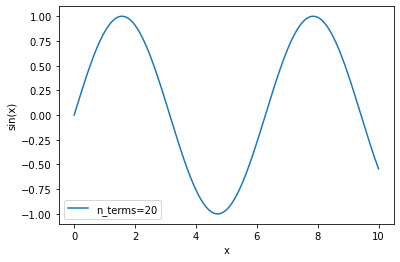

In [10]:

import matplotlib.pyplot as plt
plt.plot(list1,y,label='n_terms=20')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

8) Plot the results for different limits. How do the results differ? Additionally, plot the `sin` function from the `math` module for the same x-values to compare the results. **(10%)**

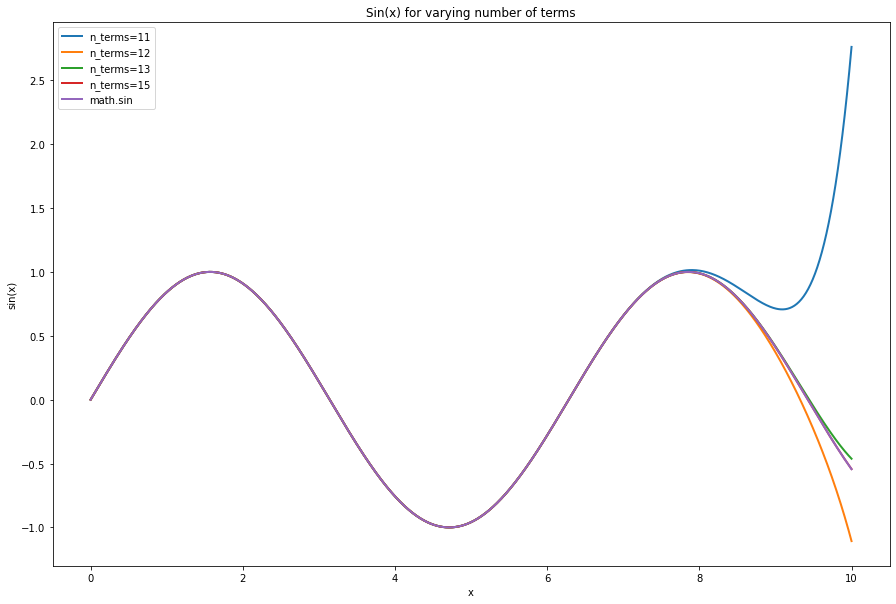

In [11]:
y1 = [sin_series(x,11) for x in list1]
y2 = [sin_series(x,12) for x in list1]
y3 = [sin_series(x,13) for x in list1]
y4 = [sin_series(x,15) for x in list1]
y5 = [math.sin(x) for x in list1]
plt.figure(figsize=(15,10))
plt.plot(list1,y1,label='n_terms=11',linewidth = 2)
plt.plot(list1,y2,label='n_terms=12',linewidth = 2)
plt.plot(list1,y3,label='n_terms=13',linewidth = 2)
plt.plot(list1,y4,label='n_terms=15',linewidth = 2)
plt.plot(list1,y5,label='math.sin',linewidth = 2)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sin(x) for varying number of terms')
plt.legend()
plt.show()

9) You can view two outputs in the same plot if you run the `plot` function in the same cell. Compare your sine function for two different limits. So that you can compare them better, plot the first function only in the range $x \in [0,5)$ and the second in the range $x \in [5,10)$. **(10%)**

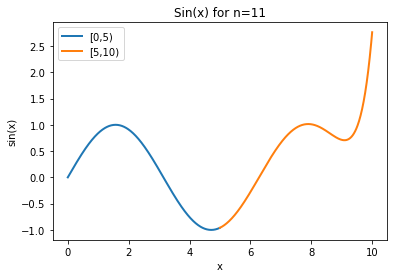

In [12]:
x1 = list1[:500]
x2 = list1[500:]
y1 = [sin_series(x,11) for x in x1]
y2 = [sin_series(x,11) for x in x2]

plt.plot(x1,y1,label = '[0,5)',linewidth = 2)
plt.plot(x2,y2,label = '[5,10)',linewidth = 2)

plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sin(x) for n=11')
plt.legend()
plt.show()